# Mauricio Hernández A00042988

## Análisis exploratorio de datos (EDA)

Importar las librerias necesarias para realizar el análisis exploratorio de datos (EDA).

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets, metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import math

In [2]:
data = pd.read_csv("Baseball.csv", sep=",")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Player       322 non-null object
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
NewLeague    322 non-null object
Salary       263 non-null float64
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


No hay datos faltantes o negativos en las variables predictoras.

## Analisis de variables numericas

In [9]:
nonNumericVar = ["Player", "League", "NewLeague", "Division"]
numericData = data.drop(columns=nonNumericVar)

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(numericData)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = numericData.columns

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe07b01db00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe07b01df28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe07b01d6d8>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe07afb0860>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe07afb0ba8>,
 'means': []}

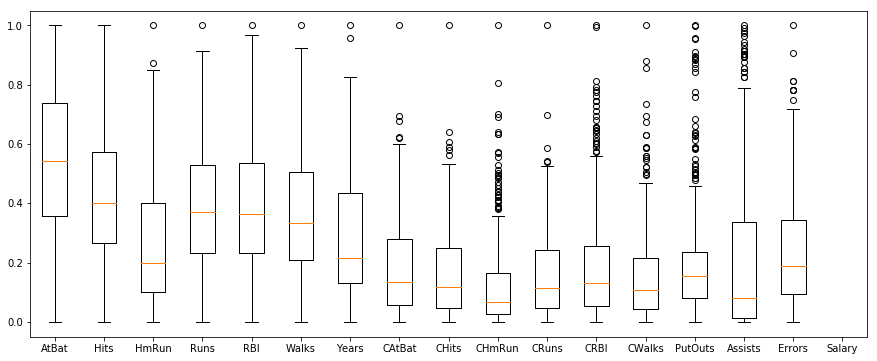

In [11]:
fig, axs = plt.subplots(figsize=(15,6))
axs.boxplot(scaled_data.T, labels=scaled_data.columns)

En general, todas la variables presentan datos atipicos pero los datos que realmente presentan problemas son aquellos que se encuentran lejos de sus los demas. En la mayoria de los casos existen dos o tres valores que deben ser eliminados para cada variable.

## Correlacion entre variables

In [12]:
noNullData = numericData.loc[~numericData.Salary.isnull(), 'Salary']
noNullData = numericData.iloc[noNullData.index]
noNullData.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


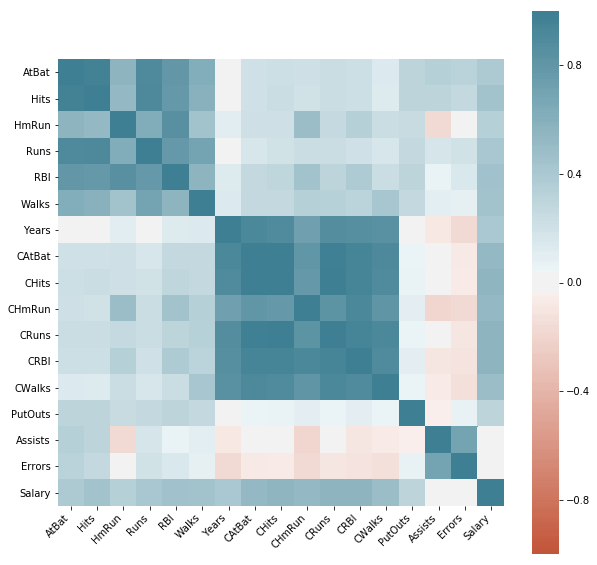

In [13]:
corr = noNullData.corr()

fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Como se puede ver en el grafico, en la ultima linea, se evidencia que la mayoria de las varibales numericas tiene una correlacion mayor a cero con la variable **SALARY**

## Analisis de varibles categoricas

In [14]:
categoryVar = ['Division', 'League', 'Salary']
categoryData = data[categoryVar]
categoryData.head()

,Division,League,Salary
0,E,A,NaN
1,W,N,475.0
2,W,A,480.0
3,E,N,500.0
4,E,N,91.5


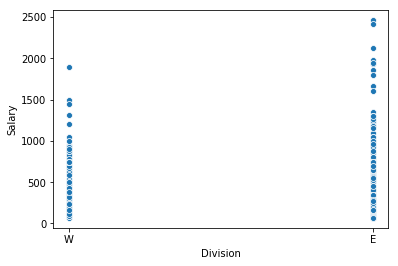

In [15]:
sns.scatterplot(x="Division",y="Salary", data=categoryData)

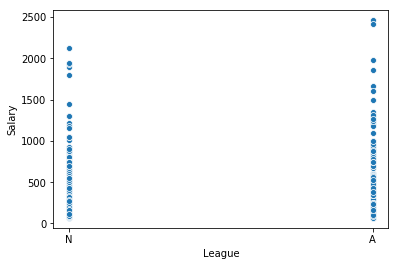

In [16]:
sns.scatterplot(x="League", y="Salary", data=categoryData)

Se puede observar que las variables categoricas predictoras nos seran utiles al momento de predecir el salario de los jugadores. Esto se evidencia en que tanto para **DIVISION** y **LEAGUE** la diferencia de salarios entre sus categorias internas no es significativa.

## Problemas encontrados y decisiones

1. Los diagramas de bigotes muestran que, a lo sumo, los 5 últimos registros son los más lejanos. En la siguinete fase estos se eliminarán.
2. Las varibales **Division**, **League**, **Newleague** y **Player** seran suprimidas pues no representan utilidad.
3. Las variables numericas **Errors** y **Assists** seran eliminadas ya que no se correlacionan con la variable objetivo.

# Modelo preliminar

Importar las librerias para hacer la regresion mediante KNN como modelo preliminar

Las varibles numericas con mayor correlacion observadas en la etapa de analisis explotartorio se usaran para el modelo preliminar.

In [17]:
targetVar = ["Salary"]
predictorVars = ["CAtBat", "CHits", "CRuns", "CRBI"]
targetData = noNullData[targetVar]
predictorData = noNullData[predictorVars]

Vamos a normalizar los datos, a realizar un holdout de estos y entrenar el modelo de regresion con un k=10 seleccionado por decision nuestra.

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
target_scaled = min_max_scaler.fit_transform(targetData)
predictor_scaled = min_max_scaler.fit_transform(predictorData)
knnModel = KNeighborsRegressor(n_neighbors=15)
X_train,X_test,y_train,y_test=train_test_split(predictor_scaled,target_scaled,test_size=.3,random_state=0)
knnModel.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='uniform')

In [19]:
def error(p):
    i=0
    m=p.size
    suma=0
    while(i<m):
        suma+=abs(y_test[i]/p[i])
        i+=1
    return (1/m)*suma

Una vez entrenado en modelo, hacemos la preddicon con los datos de pruebas y obtenemos la media del error cuadratico como metrica de evaluacion.

In [20]:
predict = knnModel.predict(X_test)
print("Error en centavos = ",math.sqrt(metrics.mean_squared_error(y_test, predict)))
print("R^2 = ",metrics.r2_score(y_test,predict))
print("Error = ",error(predict)-1)

Error en centavos =  0.16715637305674413
R^2 =  0.3940251810213673
Error =  [0.15971005]


El error que se obtuvo es de 2.4%, pero tambien se debe tener en cuenta que la cantidad de los datos son pocos.
Es posible que si tubieramos mas datos este error este sensible a cambios.

https://www.canva.com/design/DADqS-5k5eg/J0y1e-uL7al22yEdnk3wGw/edit

## Entendimiento y limpieza de los datos

In [21]:
noNullData.Salary.std()

451.1186807025387

En los diagramas de bigotes se puede ver que existen al menos jugadores que tiene la mayor valor en muchas de las variables. Vamos a eliminar estos jugadores de los datos, intentando eliminar la menor cantidad posible.

## Protocolo de evaluación

Se usará el **K-Fold Cross Validation** con un holdout de **70/30 (train/test)** de los datos.

## Evaluacion de modelos

In [22]:
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings

In [23]:
indep = noNullData.drop(columns="Salary")
colums_indep=indep.columns
dep= pd.DataFrame(noNullData["Salary"])
colums_dep=dep.columns

In [24]:
min_max_scaler = preprocessing.MinMaxScaler()
indep_data = pd.DataFrame(min_max_scaler.fit_transform(indep),columns=colums_indep)
dep_data = pd.DataFrame(min_max_scaler.fit_transform(dep),columns=colums_dep)


In [25]:
valueTest=0.33
valueSeed=44

In [26]:
def R2_adj(test_y,test_y_pred,test_x):
    r2_aj_test = 1 - (1-r2_score(test_y, test_y_pred))*(len(test_y)-1) / (len(test_y) - test_x.shape[1] - 1)
    return r2_aj_test

**Metodo de escogencia de variables con LinearRegression**

In [27]:
def forward(frame, response):
    remaining = set(frame.columns)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            indep_vars_2 = selected+[candidate]
            indep_data_2 = frame[indep_vars_2]
            train_x, test_x, train_y, test_y = train_test_split(indep_data_2, dep_data, test_size=valueTest, random_state=valueSeed)
            regr = LinearRegression(normalize=True)
            regr.fit(train_x, train_y)
            test_y_pred = regr.predict(test_x)
            score = R2_adj(test_y,test_y_pred,test_x)            
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score        
    
    
    indep_vars_2 = selected
    indep_data_2 = frame[indep_vars_2]
    return selected
    

In [28]:
reg=forward(indep_data,dep_data)
reg

['Hits',
 'CRBI',
 'AtBat',
 'Walks',
 'Years',
 'CRuns',
 'CWalks',
 'PutOuts',
 'CAtBat']

**Metodo de escogencia de variables con KNeighborsRegressor**

In [29]:
def forwardknn(frame, response):
    param_grid = {'n_neighbors': np.arange(5, 25)}
    kSelected=None
    kProcess=None
    remaining = set(frame.columns)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            indep_vars_2 = selected+[candidate]
            indep_data_2 = frame[indep_vars_2]
            train_x, test_x, train_y, test_y = train_test_split(indep_data_2, dep_data, test_size=valueTest, random_state=valueSeed)
            knn2 = KNeighborsRegressor()
            knn_gscv = GridSearchCV(knn2, param_grid, scoring='r2',cv=5)
            knn_gscv.fit(train_x,train_y)
            knn2 = KNeighborsRegressor(n_neighbors=knn_gscv.best_params_['n_neighbors'])
            knn2.fit(train_x,train_y)
            test_y_pred = knn2.predict(test_x)
            score = R2_adj(test_y,test_y_pred,test_x)            
            scores_with_candidates.append((score, candidate))
            kProcess=knn_gscv.best_params_
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            kSelected = kProcess
            current_score = best_new_score        
    
    
    indep_vars_2 = selected
    indep_data_2 = frame[indep_vars_2]
    return selected, kSelected

In [30]:
warnings.filterwarnings("ignore")
reg=forwardknn(indep_data,dep_data)
reg

(['CRBI', 'Years'], {'n_neighbors': 7})

### KNN

### Regresión lineal

### Árbol de decisión

## Entrenamiento modelos

## Caracterización de beisbolistas